# PortiaPy

Um pacote para trabalhar com a API Portia da Agriness Edge. Possui ferramentas para trabalhar com os dois principais grupos de _endpoints_ que a API oferece:

### Consultas
- Descrição (Describe);
- Perfil (Profile);
- Seleção (Select);
- Sumário (Summary);

### Estruturas do Pipeline
- Fases (Phases);
- Axiomas (Axioms);
- Especificações (Specifications);

In [1]:
import portiapy
import json

portiapy.about()

portiapy - an Agriness Edge project


# Trabalhando com o PortiaPy

## 1. PortiaApi
Classe para interação com a API, necessita de uma série de configurações para seu funcionamento passadas no construtor da classe:

In [2]:
# Exemplo
portiapy.portiaConfigExample

{'baseurl': 'http://localhost',
 'authorization': '<your API key>',
 'debug': False,
 'Accept': 'text/csv'}

#### Instanciando um objeto do tipo PortiaApi

In [3]:
from portiapy.portia import PortiaApi

portiaApi = PortiaApi({
    'baseurl': 'http://localhost',
    'authorization': '<your API key>',
    'debug': False,
    'Accept': 'text/csv'
})

## 2. EdgeDevice
Classe para interação com as consultas oferecidas pela API:

### 2.1. Describe
* Funções de **descrição** de um dispositivo para conhecimento de suas portas, sensores e códigos de dimensão;

In [4]:
# Parâmetros utilizados no exemplo
device = ''
port = 1
sensor = 1
dimension = 1

#### Parâmetros Possíveis (Todos Opcionais)

In [5]:
params = {
    'from': None,
    'to': None,
    'precision': 'ms',
    'sort': True
}

#### Lista de Portas

In [6]:
# /describe/device/:device/ports
portiaApi.device(device).ports(params=params)

['0', '1', '2', '4', '5', '8']

In [7]:
# /describe/device/:device/ports/last
portiaApi.device(device).ports(last=True, params=params)

,header_timestamp,port,dimension_thing_code
0,1565036009061,0,28
1,1565036063683,1,15
2,1565036063687,2,15
3,1565036063699,4,16
4,1565036063707,5,16
5,1565036063715,8,22


In [8]:
# With humanization
portiaApi.device(device).ports(last=True, params=params).humanize(locale='pt-br')

,header_timestamp,port,dimension_thing
0,1565036009061,0,HubAmbientte
1,1565036063683,1,ProbeSmaaiT
2,1565036063687,2,ProbeSmaaiT
3,1565036063699,4,ProbeSmaaiTU
4,1565036063707,5,ProbeSmaaiTU
5,1565036063715,8,ProbeSmaaiH2O


In [9]:
# With timestamp humanization
portiaApi.device(device).ports(last=True, params=params).humanize(datetime=True, locale='pt-br')

,header_datetime,port,dimension_thing
0,faz 23 dias,0,HubAmbientte
1,faz 23 dias,1,ProbeSmaaiT
2,faz 23 dias,2,ProbeSmaaiT
3,faz 23 dias,4,ProbeSmaaiTU
4,faz 23 dias,5,ProbeSmaaiTU
5,faz 23 dias,8,ProbeSmaaiH2O


#### Lista de Sensores por Porta

In [10]:
# /describe/device/:device/port/:port/sensors
portiaApi.device(device).port(port).sensors(params=params)

['1']

In [11]:
# /describe/device/:device/port/:port/sensors/last
portiaApi.device(device).port(port).sensors(last=True, params=params)

,header_timestamp,sensor,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code
0,1565036063683,1,16.7,1,1,15


In [12]:
# With humanization
portiaApi.device(device).port(port).sensors(last=True, params=params).humanize(locale='pt-br')

,header_timestamp,sensor,dimension_value,dimension,dimension_unity,dimension_thing
0,1565036063683,1,16.7,Temperatura Pontual,°C,ProbeSmaaiT


In [13]:
# With timestamp humanization
portiaApi.device(device).port(port).sensors(last=True, params=params).humanize(datetime=True, locale='pt-br')

,header_datetime,sensor,dimension_value,dimension,dimension_unity,dimension_thing
0,faz 23 dias,1,16.7,Temperatura Pontual,°C,ProbeSmaaiT


#### Lista de Códigos de Dimensão por Porta

In [14]:
# /describe/device/:device/port/:port/dimensions
portiaApi.device(device).port(port).dimensions(params=params)

['1']

In [15]:
# /describe/device/:device/port/:port/dimensions/last
portiaApi.device(device).port(port).dimensions(last=True, params=params)

,header_timestamp,dimension_code,sensor,dimension_thing_code
0,1565036063683,1,1,15


In [16]:
# With humanization
portiaApi.device(device).port(port).dimensions(last=True, params=params).humanize(locale='pt-br')

,header_timestamp,dimension,sensor,dimension_thing
0,1565036063683,Temperatura Pontual,1,ProbeSmaaiT


In [17]:
# With timestamp humanization
portiaApi.device(device).port(port).dimensions(last=True, params=params).humanize(datetime=True, locale='pt-br')

,header_datetime,dimension,sensor,dimension_thing
0,faz 23 dias,Temperatura Pontual,1,ProbeSmaaiT


#### Lista de Códigos de Dimensão por Porta e Sensor

In [18]:
# /describe/device/:device/port/:port/sensor/:sensor/dimensions
portiaApi.device(device).port(port).sensor(sensor).dimensions(params=params)

['1']

In [19]:
# /describe/device/:device/port/:port/sensor/:sensor/dimensions/last
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code
0,1565036063683,16.7,1,1,15


In [20]:
# With humanization
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize(locale='pt-br')

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing
0,1565036063683,16.7,Temperatura Pontual,°C,ProbeSmaaiT


In [21]:
# With timestamp humanization
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize(datetime=True, locale='pt-br')

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing
0,faz 23 dias,16.7,Temperatura Pontual,°C,ProbeSmaaiT


### 2.2. Profile
* Funções para obtenção do perfil de um dispositivo;

#### Parâmetros Possíveis (Todos Opcionais)

In [22]:
from portiapy.profile import ProfileStrategies

strategy = ProfileStrategies.BY_ZERO_PORT

interval = 30

params = {
    'precision': 'ms',
    'sort': True
}

#### Perfil do Dispositivo

In [23]:
# /profile/device/:device/:strategy/:interval
temp = portiaApi.device(device).profile(strategy=strategy, interval=interval, params=params)
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": 28,
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "0",
         "thing_code": 28,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036009061,
                  "dimension_value": 802038,
                  "dimension_code": "15",
                  "dimension_unity_code": 6,
                  "dimension_thing_code": 28
               }
            }
         ]
      },
      {
         "port": "1",
         "thing_code": 15,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036063683,
                  "dimension_value": 16.7,
                  "dimension_code": "1",
                  "dimension_unity_code": 1,
                  "dimension_thing_code": 15
               }
            }
         ]
      },
      {

In [24]:
# Com humanização
temp = portiaApi.device(device).profile(strategy=strategy, interval=interval, params=params).humanize(locale='pt-br')
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": "HubAmbientte",
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "0",
         "thing_code": "HubAmbientte",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036009061,
                  "dimension_value": 802038,
                  "dimension": "Tempo Acumulado",
                  "dimension_unity": "s",
                  "dimension_thing": "HubAmbientte"
               }
            }
         ]
      },
      {
         "port": "1",
         "thing_code": "ProbeSmaaiT",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036063683,
                  "dimension_value": 16.7,
                  "dimension": "Temperatura Pontual",
                  "dimension_unity": "\u00b0C",
                  "dimension_thing": "Pr

In [25]:
# Com humanização de timestamp
temp = portiaApi.device(device).profile(strategy=strategy, interval=interval, params=params).humanize(datetime=True, locale='pt-br')
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": "HubAmbientte",
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "0",
         "thing_code": "HubAmbientte",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "dimension_value": 802038,
                  "header_datetime": "faz 23 dias",
                  "dimension": "Tempo Acumulado",
                  "dimension_unity": "s",
                  "dimension_thing": "HubAmbientte"
               }
            }
         ]
      },
      {
         "port": "1",
         "thing_code": "ProbeSmaaiT",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "dimension_value": 16.7,
                  "header_datetime": "faz 23 dias",
                  "dimension": "Temperatura Pontual",
                  "dimension_unity": "\u00b0C",
                  "dimension_thing": "Prob

#### Perfil do Dispositivo por Porta

In [26]:
# /profile/device/:device/port/:port/:strategy/:interval
temp = portiaApi.device(device).port(port).profile(strategy=strategy, interval=interval, params=params)
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": 28,
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "1",
         "thing_code": 15,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036063683,
                  "dimension_value": 16.7,
                  "dimension_code": "1",
                  "dimension_unity_code": 1,
                  "dimension_thing_code": 15
               }
            }
         ]
      }
   ]
}


In [27]:
# Com humanização
temp = portiaApi.device(device).port(port).profile(strategy=strategy, interval=interval, params=params).humanize(locale='pt-br')
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": "HubAmbientte",
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "1",
         "thing_code": "ProbeSmaaiT",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036063683,
                  "dimension_value": 16.7,
                  "dimension": "Temperatura Pontual",
                  "dimension_unity": "\u00b0C",
                  "dimension_thing": "ProbeSmaaiT"
               }
            }
         ]
      }
   ]
}


In [28]:
# Com humanização de timestamp
temp = portiaApi.device(device).port(port).profile(strategy=strategy, interval=interval, params=params).humanize(datetime=True, locale='pt-br')
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": "HubAmbientte",
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "1",
         "thing_code": "ProbeSmaaiT",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "dimension_value": 16.7,
                  "header_datetime": "faz 23 dias",
                  "dimension": "Temperatura Pontual",
                  "dimension_unity": "\u00b0C",
                  "dimension_thing": "ProbeSmaaiT"
               }
            }
         ]
      }
   ]
}


#### Perfil do Dispositivo por Porta e Sensor

In [29]:
# /profile/device/:device/port/:port/sensor/:sensor/:strategy/:interval
temp = portiaApi.device(device).port(port).sensor(sensor).profile(strategy=strategy, interval=interval, params=params)
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": 28,
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "1",
         "thing_code": 15,
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036063683,
                  "dimension_value": 16.7,
                  "dimension_code": "1",
                  "dimension_unity_code": 1,
                  "dimension_thing_code": 15
               }
            }
         ]
      }
   ]
}


In [30]:
# Com humanização
temp = portiaApi.device(device).port(port).sensor(sensor).profile(strategy=strategy, interval=interval, params=params).humanize(locale='pt-br')
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": "HubAmbientte",
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "1",
         "thing_code": "ProbeSmaaiT",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "header_timestamp": 1565036063683,
                  "dimension_value": 16.7,
                  "dimension": "Temperatura Pontual",
                  "dimension_unity": "\u00b0C",
                  "dimension_thing": "ProbeSmaaiT"
               }
            }
         ]
      }
   ]
}


In [31]:
# Com humanização de timestamp
temp = portiaApi.device(device).port(port).sensor(sensor).profile(strategy=strategy, interval=interval, params=params).humanize(datetime=True, locale='pt-br')
print( json.dumps(temp, indent=3) )

{
   "device": "7ZXTG3212S24",
   "thing_code": "HubAmbientte",
   "channel_id": "1EE27177Z5X8",
   "channel_code": 14,
   "ports": [
      {
         "port": "1",
         "thing_code": "ProbeSmaaiT",
         "sensors": [
            {
               "sensor": "1",
               "last_package": {
                  "dimension_value": 16.7,
                  "header_datetime": "faz 23 dias",
                  "dimension": "Temperatura Pontual",
                  "dimension_unity": "\u00b0C",
                  "dimension_thing": "ProbeSmaaiT"
               }
            }
         ]
      }
   ]
}


### 2.3. Select
* Funções para obtenção dos últimos pacotes de um dispositivo;

#### Parâmetros Possíveis (Todos Opcionais)

In [32]:
params = {
    'from': None,
    'to': None,
    'order': None,
    'precision': 'ms',
    'limit': None
}

#### Pacotes por Porta e Sensor

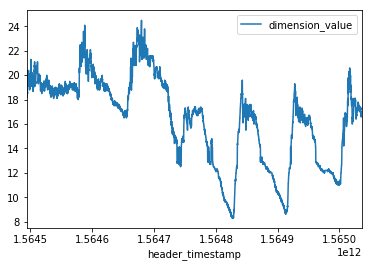

In [33]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).select(params=params)
df.plot(x='header_timestamp', y='dimension_value')

In [34]:
portiaApi.device(device).port(port).sensor(sensor).select(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code,Unnamed: 5
0,1565036063683,16.7,1,1,15,NaN


In [35]:
# Com humanização
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize(locale='pt-br')

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing
0,1565036063683,16.7,Temperatura Pontual,°C,ProbeSmaaiT


In [36]:
# Com humanização de timestamp
portiaApi.device(device).port(port).sensor(sensor).dimensions(last=True, params=params).humanize(datetime=True, locale='pt-br')

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing
0,faz 23 dias,16.7,Temperatura Pontual,°C,ProbeSmaaiT


#### Pacotes por Porta e Código de Dimensão

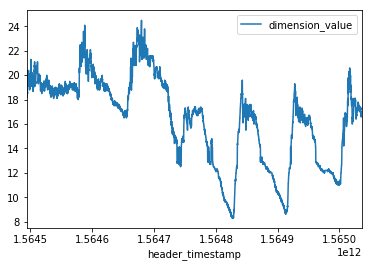

In [37]:
%matplotlib inline

df = portiaApi.device(device).port(port).dimension(dimension).select(params=params)
df.plot(x='header_timestamp', y='dimension_value')

In [38]:
portiaApi.device(device).port(port).dimension(dimension).select(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code,Unnamed: 5
0,1565036063683,16.7,1,1,15,NaN


In [39]:
# Com humanização
portiaApi.device(device).port(port).dimension(dimension).select(last=True, params=params).humanize(locale='pt-br')

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,1565036063683,16.7,Temperatura Pontual,°C,ProbeSmaaiT,NaN


In [40]:
# Com humanização de timestamp
portiaApi.device(device).port(port).dimension(dimension).select(last=True, params=params).humanize(datetime=True, locale='pt-br')

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,faz 23 dias,16.7,Temperatura Pontual,°C,ProbeSmaaiT,NaN


#### Pacotes por Porta, Sensor e Código de Dimensão

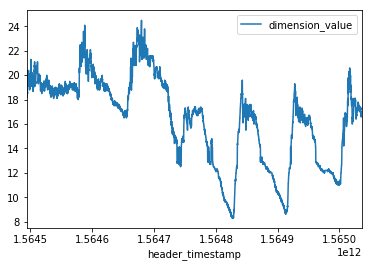

In [41]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(params=params)
df.plot(x='header_timestamp', y='dimension_value')

In [42]:
portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(last=True, params=params)

,header_timestamp,dimension_value,dimension_code,dimension_unity_code,dimension_thing_code,Unnamed: 5
0,1565036063683,16.7,1,1,15,NaN


In [43]:
# Com humanização
portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(last=True, params=params).humanize(locale='pt-br')

,header_timestamp,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,1565036063683,16.7,Temperatura Pontual,°C,ProbeSmaaiT,NaN


In [44]:
# Com humanização de timestamp
portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).select(last=True, params=params).humanize(datetime=True, locale='pt-br')

,header_datetime,dimension_value,dimension,dimension_unity,dimension_thing,Unnamed: 5
0,faz 23 dias,16.7,Temperatura Pontual,°C,ProbeSmaaiT,NaN


### 2.4. Summary
* Funções para obtenção de sumários de um dispositivo;

#### Parâmetros Possíveis (Todos Opcionais)

In [45]:
from portiapy.summary import SummaryStrategies

strategy = SummaryStrategies.PER_HOUR

interval = 1

params = {
    'from': None,
    'to': None,
    'order': None,
    'precision': 'ms',
    'min': True,
    'max': True,
    'sum': True,
    'avg': True,
    'median': False,
    'mode': False,
    'stddev': False,
    'spread': False
}

#### Sumário por Porta e Sensor

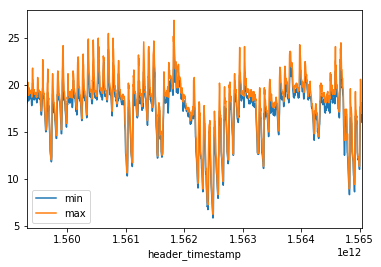

In [46]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')

#### Sumário por Porta, Sensor e Código de Dimensão

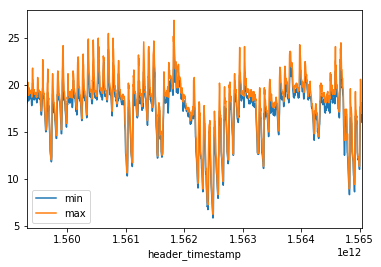

In [47]:
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')

## 3. EdgePipeline
Classe para interação com as estruturas de pipeline oferecidas pela API:

In [48]:
pipeline = portiaApi.pipeline()

### 3.1. EdgePipelinePhase
* Classe para criação, leitura e atualização de **fases** pertencentes ao pipeline;
* As **fases** são responsáveis pelo tratamento das séries temporais, modificando-as de acordo com suas próprias definições;
* Atualmente há apenas **fases** do tipo consulta (_query_). Estas realizam modificações diretamente na consulta realizada ao banco e não na série temporal retornada;

In [49]:
phase = pipeline.phase()

In [50]:
# Lista todas as fases
temp = phase.list()
print( json.dumps(temp, indent=3) )

[
   {
      "name": "time_query",
      "type": "query",
      "created_at": "2019-05-01 20:03:14",
      "updated_at": "2019-05-01 20:03:14",
      "params": [
         {
            "label": "from",
            "target": "time",
            "operator": ">="
         },
         {
            "label": "to",
            "target": "time",
            "operator": "<="
         }
      ]
   },
   {
      "name": "default_query",
      "type": "query",
      "created_at": "2019-05-01 20:03:15",
      "updated_at": "2019-05-01 20:03:15",
      "params": [
         {
            "label": "lower_bound",
            "target": "value",
            "operator": ">="
         },
         {
            "label": "upper_bound",
            "target": "value",
            "operator": "<="
         },
         {
            "label": "number_of_packages",
            "target": "number_of_packages",
            "operator": ">="
         }
      ]
   }
]


In [51]:
# Criar/salvar uma nova fase
temp = phase.create({
    'name': 'test_query',
    'type': 'query',
    'params': [{
        'label': 'test',
        'target': 'value',
        'operator': '>'
    }]
})
print( json.dumps(temp, indent=3) )

{
   "name": "test_query",
   "type": "query",
   "params": [
      {
         "label": "test",
         "target": "value",
         "operator": ">"
      }
   ],
   "created_at": "2019-08-29 13:44:55",
   "updated_at": "2019-08-29 13:44:55"
}


In [52]:
# Exibe uma única fase
temp = phase.display('test_query')
print( json.dumps(temp, indent=3) )

{
   "name": "test_query",
   "type": "query",
   "created_at": "2019-08-29 16:44:55",
   "updated_at": "2019-08-29 16:44:55",
   "params": [
      {
         "label": "test",
         "target": "value",
         "operator": ">"
      }
   ]
}


In [53]:
# Atualiza os detalhes de uma fase
phase.update('test_query', {
    'name': 'test_query',
    'type': 'query',
    'params': [{
        'label': 'test_updated',
        'target': 'value',
        'operator': '>'
    }]    
})

# Exibe alteração
print()
temp = phase.display('test_query')
print( json.dumps(temp, indent=3) )


{
   "name": "test_query",
   "type": "query",
   "created_at": "2019-08-29 16:44:55",
   "updated_at": "2019-08-29 16:44:57",
   "params": [
      {
         "label": "test_updated",
         "target": "value",
         "operator": ">"
      }
   ]
}


### 3.2. EdgePipelineAxiom
* Classe para criação, deleção, leitura e atualização de **axiomas** pertencentes ao pipeline;
* Os **axiomas** são conjuntos de fases;
* Determinam as alterações que ocorrerão em uma série temporal de acordo com suas fases;
* Possuem sistema de privacidade, podendo ser públicos ou privados;

In [54]:
axiom = pipeline.axiom()

In [55]:
# Lista todos os axiomas
temp = axiom.list()
print( json.dumps(temp, indent=3) )

{
   "private": [],
   "public": [
      {
         "name": "time_axiom_v1",
         "user_id": 21,
         "public": true,
         "created_at": "2019-05-01 20:03:15",
         "updated_at": "2019-05-01 20:03:15",
         "phases": [
            {
               "name": "time_query",
               "type": "query",
               "created_at": "2019-05-01 20:03:14",
               "updated_at": "2019-05-01 20:03:14",
               "pivot": {
                  "phase_name": "time_query",
                  "axiom_name": "time_axiom_v1"
               }
            }
         ]
      },
      {
         "name": "edge_axiom_v1",
         "user_id": 21,
         "public": true,
         "created_at": "2019-05-01 20:03:15",
         "updated_at": "2019-05-01 20:03:15",
         "phases": [
            {
               "name": "time_query",
               "type": "query",
               "created_at": "2019-05-01 20:03:14",
               "updated_at": "2019-05-01 20:03:14",
            

In [56]:
# Criar/salvar um novo axioma
temp = axiom.create({
    'name': 'test_axiom_v1',
    'public': False,
    'phases': ['time_query', 'test_query']
})
print( json.dumps(temp, indent=3) )

{
   "name": "test_axiom_v1",
   "public": false,
   "user_id": 34,
   "created_at": "2019-08-29 13:44:59",
   "updated_at": "2019-08-29 13:44:59",
   "phases": [
      {
         "name": "time_query",
         "type": "query",
         "created_at": "2019-05-01 20:03:14",
         "updated_at": "2019-05-01 20:03:14",
         "pivot": {
            "phase_name": "time_query",
            "axiom_name": "test_axiom_v1"
         }
      },
      {
         "name": "test_query",
         "type": "query",
         "created_at": "2019-08-29 16:44:55",
         "updated_at": "2019-08-29 16:44:57",
         "pivot": {
            "phase_name": "test_query",
            "axiom_name": "test_axiom_v1"
         }
      }
   ]
}


In [57]:
# Exibe um único axioma
temp = axiom.display('test_axiom_v1')
print( json.dumps(temp, indent=3) )

{
   "name": "test_axiom_v1",
   "user_id": 34,
   "public": false,
   "created_at": "2019-08-29 16:44:59",
   "updated_at": "2019-08-29 16:44:59",
   "phases": [
      {
         "name": "time_query",
         "type": "query",
         "created_at": "2019-05-01 20:03:14",
         "updated_at": "2019-05-01 20:03:14",
         "pivot": {
            "phase_name": "time_query",
            "axiom_name": "test_axiom_v1"
         }
      },
      {
         "name": "test_query",
         "type": "query",
         "created_at": "2019-08-29 16:44:55",
         "updated_at": "2019-08-29 16:44:57",
         "pivot": {
            "phase_name": "test_query",
            "axiom_name": "test_axiom_v1"
         }
      }
   ]
}


In [58]:
# Atualiza os detalhes de um axioma
axiom.update('test_axiom_v1', {
    'public': True
})

# Exibe alteração
print()
temp = axiom.display('test_axiom_v1')
print( json.dumps(temp, indent=3) )


{
   "name": "test_axiom_v1",
   "user_id": 34,
   "public": true,
   "created_at": "2019-08-29 19:44:59",
   "updated_at": "2019-08-29 16:45:00",
   "phases": [
      {
         "name": "time_query",
         "type": "query",
         "created_at": "2019-05-01 20:03:14",
         "updated_at": "2019-05-01 20:03:14",
         "pivot": {
            "phase_name": "time_query",
            "axiom_name": "test_axiom_v1"
         }
      },
      {
         "name": "test_query",
         "type": "query",
         "created_at": "2019-08-29 16:44:55",
         "updated_at": "2019-08-29 16:44:57",
         "pivot": {
            "phase_name": "test_query",
            "axiom_name": "test_axiom_v1"
         }
      }
   ]
}


In [59]:
# Deleta um axioma
temp = axiom.delete('test_axiom_v1')
print( json.dumps(temp, indent=3) )

{
   "message": "Axiom succesfully deleted"
}


### 3.3. EdgePipelineSpecification
* Classe para criação, deleção, leitura e atualização de **especificações** pertencentes ao pipeline;
* Suas regras determinam quais axiomas serão utilizados para alterar cada série temporal de acordo com seus metadados (porta, sensor, código de dimensão, etc...);
* Também determina quais os valores que o axioma irá utilizar para alteração da série temporal;

In [60]:
spec = pipeline.specification()

In [61]:
# Lista todas as especificações
temp = spec.list()
print( json.dumps(temp, indent=3) )

{
   "private": [],
   "public": [
      {
         "name": "default",
         "user_id": 21,
         "public": true,
         "created_at": "2019-05-01 20:03:15",
         "updated_at": "2019-05-01 20:03:15",
         "rows": [
            {
               "id": 32,
               "spec_name": "default",
               "axiom_name": "edge_axiom_v1",
               "query_profile": {
                  "channel_code": "*",
                  "channel_id": "*",
                  "device_thing_code": "*",
                  "edge_id": "*",
                  "port": "*",
                  "sensor": "*",
                  "dimension_code": "1",
                  "unity_code": "*",
                  "thing_code": "*"
               },
               "axiom_params": {
                  "from": "@",
                  "to": "@",
                  "lower_bound": 0,
                  "upper_bound": 60,
                  "number_of_packages": "#"
               },
               "created_at": "201

In [62]:
# Criar/salvar uma nova especificação
temp = spec.create({
    'name': 'test',
    'public': False,
    'rows': [{
        'axiom_name': 'edge_axiom_v1',
        'query_profile': {
            'channel_code': '*',
            'channel_id': '*',
            'device_thing_code': '*',
            'edge_id': '*',
            'port': '*',
            'sensor': '*',
            'dimension_code': '*',
            'unity_code': '*',
            'thing_code': '*'
        },
        'axiom_params': {
            'from': '@', 'to': '@', 'lower_bound': '#', 'upper_bound': '#', 'number_of_packages': '#'
        }
    }]
})
print( json.dumps(temp, indent=3) )

{
   "name": "test",
   "public": false,
   "user_id": 34,
   "created_at": "2019-08-29 13:45:03",
   "updated_at": "2019-08-29 13:45:03",
   "rows": [
      {
         "id": 49,
         "spec_name": "test",
         "axiom_name": "edge_axiom_v1",
         "query_profile": {
            "channel_code": "*",
            "channel_id": "*",
            "device_thing_code": "*",
            "edge_id": "*",
            "port": "*",
            "sensor": "*",
            "dimension_code": "*",
            "unity_code": "*",
            "thing_code": "*"
         },
         "axiom_params": {
            "from": "@",
            "to": "@",
            "lower_bound": "#",
            "upper_bound": "#",
            "number_of_packages": "#"
         },
         "created_at": "2019-08-29 16:45:03",
         "updated_at": "2019-08-29 16:45:03"
      }
   ]
}


In [63]:
# Exibe uma única especificação
temp = spec.display('test')
print( json.dumps(temp, indent=3) )

{
   "name": "test",
   "user_id": 34,
   "public": false,
   "created_at": "2019-08-29 16:45:03",
   "updated_at": "2019-08-29 16:45:03",
   "rows": [
      {
         "id": 49,
         "spec_name": "test",
         "axiom_name": "edge_axiom_v1",
         "query_profile": {
            "channel_code": "*",
            "channel_id": "*",
            "device_thing_code": "*",
            "edge_id": "*",
            "port": "*",
            "sensor": "*",
            "dimension_code": "*",
            "unity_code": "*",
            "thing_code": "*"
         },
         "axiom_params": {
            "from": "@",
            "to": "@",
            "lower_bound": "#",
            "upper_bound": "#",
            "number_of_packages": "#"
         },
         "created_at": "2019-08-29 16:45:03",
         "updated_at": "2019-08-29 16:45:03"
      }
   ]
}


In [64]:
# Atualiza os detalhes de uma especificação
spec.update('test', {
    'public': True
})

# Exibe alteração
print()
temp = spec.display('test')
print( json.dumps(temp, indent=3) )


{
   "name": "test",
   "user_id": 34,
   "public": true,
   "created_at": "2019-08-29 19:45:03",
   "updated_at": "2019-08-29 16:45:04",
   "rows": [
      {
         "id": 49,
         "spec_name": "test",
         "axiom_name": "edge_axiom_v1",
         "query_profile": {
            "channel_code": "*",
            "channel_id": "*",
            "device_thing_code": "*",
            "edge_id": "*",
            "port": "*",
            "sensor": "*",
            "dimension_code": "*",
            "unity_code": "*",
            "thing_code": "*"
         },
         "axiom_params": {
            "from": "@",
            "to": "@",
            "lower_bound": "#",
            "upper_bound": "#",
            "number_of_packages": "#"
         },
         "created_at": "2019-08-29 16:45:03",
         "updated_at": "2019-08-29 16:45:03"
      }
   ]
}


In [65]:
# Deleta uma especificação
temp = spec.delete('test')
print( json.dumps(temp, indent=3) )

{
   "message": "Specification succesfully deleted"
}


## 4. Implicação do Uso de Especificações nas Consultas
* Por padrão toda consulta utiliza a **especificação** padrão (_default_);
* É possível que nos exemplos apresentados dois gráficos da mesma série temporal possam ter sido exibidos de maneira diferente dado a presença do código da dimensão na consulta;
* Isto ocorre devido a ação da **especificação** que determinou por qual pipeline (**axioma** + **fases**) a série temporal será tratada e quais valores serão utilizados neste tratamento;

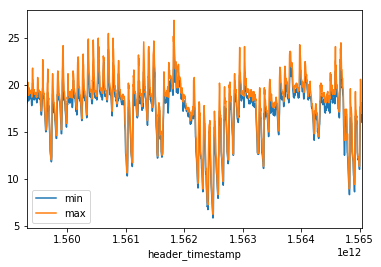

In [66]:
# Exemplo com a especificação default
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')

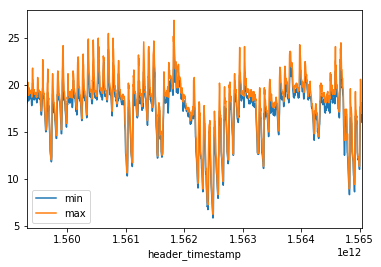

In [67]:
# Exemplo com a especificação raw
params['specification'] = 'raw'
%matplotlib inline

df = portiaApi.device(device).port(port).sensor(sensor).dimension(dimension).summary(strategy=strategy, interval=interval, params=params)
ax = df.plot(x='header_timestamp', y='min')
ax = df.plot(ax=ax, x='header_timestamp', y='max')